In [19]:
import pandas as pd
pd.set_option('display.max_columns',100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [2]:
#Load the data
data = pd.read_table('WhatsApp Chat with NLP 100 Hours Batch 2.txt',sep='\t')

In [3]:
#View the attributes of the files loaded
data.head()

,"11/12/19, 11:38 AM - +91 6302 217 120 created group ""NLP 100 Hours Batch-2"""
0,"11/19/19, 3:46 PM - +91 90348 50345: Drive lin..."
1,"11/19/19, 3:49 PM - +91 82475 90372: Me also w..."
2,"11/19/19, 3:56 PM - +91 94378 01901: It will b..."
3,"11/19/19, 3:56 PM - +91 90900 09356: 👍"
4,"11/19/19, 4:01 PM - +91 72055 31464: Can I ple..."


In [4]:
#Set the column name to the text
data.columns=['Text']
data.head()

,Text
0,"11/19/19, 3:46 PM - +91 90348 50345: Drive lin..."
1,"11/19/19, 3:49 PM - +91 82475 90372: Me also w..."
2,"11/19/19, 3:56 PM - +91 94378 01901: It will b..."
3,"11/19/19, 3:56 PM - +91 90900 09356: 👍"
4,"11/19/19, 4:01 PM - +91 72055 31464: Can I ple..."


In [5]:
#Function to check if the data starts with date or not
import re
def startsWithDate(s):
    pattern = '^([0-9]{1,2})(\/)([0-9]{1,2})(\/)([0-9]{2,4},)'
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [6]:
#Function to check if the author name is there or not 

def startsWithAuthor(s):
    patterns = [
              '([\w]+):',
              '([\w]+[\s]+[\w]+):',
              '([\w]+[\s]+[\w]+[\s]+[\w]+):',
              '([+]\d{2} \d{5} \d{5}):',
              '([+]\d{2} \d{3} \d{3} \d{4}):',
              '([+]\d{2} \d{4} \d{7})'
            ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [7]:
#Function to extract the data
def ExtractData(text):
    splitLine = text.split(" - ")
    dateTime = splitLine[0]
    date,time = dateTime.split(", ")
    time1  = time.split(" ")[0]
    am_pm = time.split(" ")[1]
    message = ' '.join(splitLine[1:])
    if startsWithAuthor(message):
        splitMessage = message.split(': ')
        author = splitMessage[0]
        message = ' '.join(splitMessage[1:])
    else:
        author=None
    
    return date,time1,am_pm,author,message

In [8]:
parsedData = []
filepath = 'WhatsApp Chat with NLP 100 Hours Batch 2.txt'
with open(filepath,encoding = 'utf-8') as fp:
    fp.readline()
    messageBuffer=[]
    date,time,am_pm,author=None,None,None,None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if startsWithDate(line):
            if len(messageBuffer) > 0:
                parsedData.append([date,time,am_pm,author,' '.join(messageBuffer)])
                messageBuffer.clear()
                date,time,am_pm,author,message =ExtractData(line)
                messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [9]:
#Create the dataset of the pandas dataframe
df =pd.DataFrame(parsedData,columns=['Date','Time','AM/PM','Author','Message'])
df = df[1:]
df.head()

,Date,Time,AM/PM,Author,Message
1,11/19/19,4:02,PM,+91 99875 07468,Same here I cud t attend .. office issues
2,11/19/19,4:10,PM,+91 81054 54221,"I think there is ""view recordings"" section is ..."
3,11/19/19,4:11,PM,+91 81054 54221,Only theory... Try to catch next session becau...
4,11/19/19,4:12,PM,+91 72055 31464,Sure sure
5,11/19/19,4:12,PM,+91 72055 31464,Thanks for the note


In [10]:
#EDA Section Starts from here.
df.tail()

,Date,Time,AM/PM,Author,Message
1986,1/27/20,10:47,PM,+91 89896 40838,Top users you mean members with high number of...
1987,1/27/20,10:47,PM,AVI,Yes
1988,1/27/20,10:47,PM,+91 89896 40838,Yess done
1989,1/27/20,10:47,PM,+91 89896 40838,But contact was not saved
1990,1/27/20,10:47,PM,+91 89896 40838,Soo got the numbers


In [11]:
df.describe()

,Date,Time,AM/PM,Author,Message
count,1990,1990,1990,1936,1990
unique,66,592,2,60,1656
top,1/21/20,10:45,PM,AVI,<Media omitted>
freq,110,17,1462,166,182


In [12]:
#Count the number of uniue authors

# df['Author'].unique()

In [14]:
df['Word_Count'] = df['Message'].apply(lambda s:len(s))
df['Letter_Count'] = df['Message'].apply(lambda s:len(s.split(' ')))
df.head()

,Date,Time,AM/PM,Author,Message,Word_Count,Letter_Count
1,11/19/19,4:02,PM,+91 99875 07468,Same here I cud t attend .. office issues,41,9
2,11/19/19,4:10,PM,+91 81054 54221,"I think there is ""view recordings"" section is ...",117,22
3,11/19/19,4:11,PM,+91 81054 54221,Only theory... Try to catch next session becau...,72,13
4,11/19/19,4:12,PM,+91 72055 31464,Sure sure,9,2
5,11/19/19,4:12,PM,+91 72055 31464,Thanks for the note,19,4


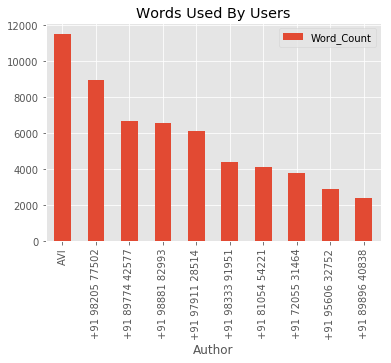

In [21]:
#Visualizations
#1) Total Number of Words Used by Author
words_per_user = df[['Author','Word_Count']].groupby('Author').sum()
words_per_user = words_per_user.sort_values('Word_Count',ascending=False)
top_users = words_per_user.head(10)
#Plot the bar plot
top_users.plot(kind='bar',title='Words Used By Users',legend=True)

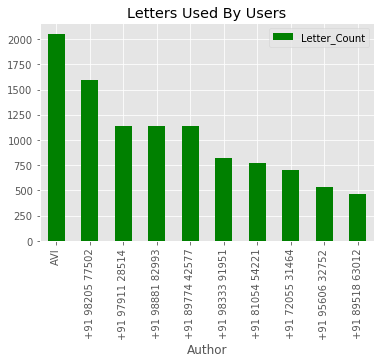

In [29]:
#Letter used by per user
letters_per_user = df[['Author','Letter_Count']].groupby('Author').sum()
letters_per_user = letters_per_user.sort_values('Letter_Count',ascending=False)
top_users = letters_per_user.head(10)
#Plot the bar plot
top_users.plot(kind='bar',title='Letters Used By Users',legend=True,color='green')

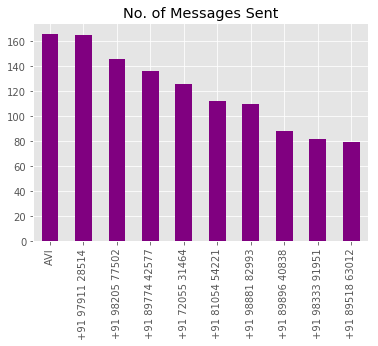

In [34]:
#Top 10 Senders
counts = df['Author'].value_counts()[:10]
counts.plot(kind='bar',title="No. of Messages Sent", color ='purple')



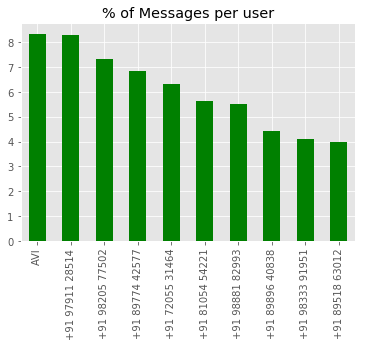

In [41]:
#Contribution of Messages by user in proportion
prop = round(df['Author'].value_counts()[:10]/len(df)*100,2)
prop.plot(kind='bar',title='% of Messages per user',color='green')

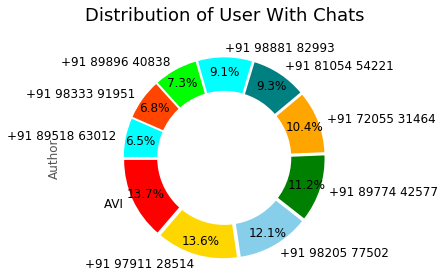

In [48]:
#Proportion of Messages sent by Users(Pie Chart)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

user=df.groupby('Author')['Author'].count().nlargest(10)

def user_chat_pie(user):
    fig, ax = plt.subplots()
    explodex = []
    for i in np.arange(len(user)):
        explodex.append(0.05)
    ax = user.plot(kind='pie', colors = ['red','gold','skyblue','green','orange','teal','cyan','lime','orangered','aqua'], fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85, explode = explodex)
    inner_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(inner_circle)
    ax.axis('equal')  
    ax.set_title("Distribution of User With Chats\n", fontsize=18)
    plt.tight_layout()
    plt.show()
   #plt.savefig('pie.png',bbox_inches='tight')
user_chat_pie(user)



Text(0, 0.5, 'No of Messages')

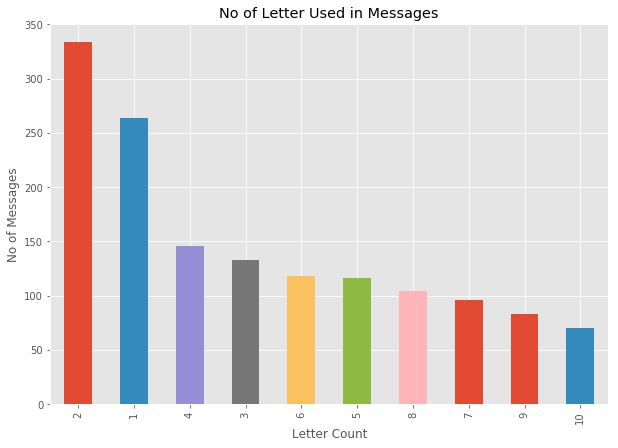

In [47]:
#No of Letter in a Messages
plt.figure(figsize=(10,7))
no_of_letter = df['Letter_Count'].value_counts()
no_of_letter=no_of_letter[:10]
no_of_letter.plot(kind='bar', title='No of Letter Used in Messages')
plt.xlabel("Letter Count")
plt.ylabel("No of Messages")

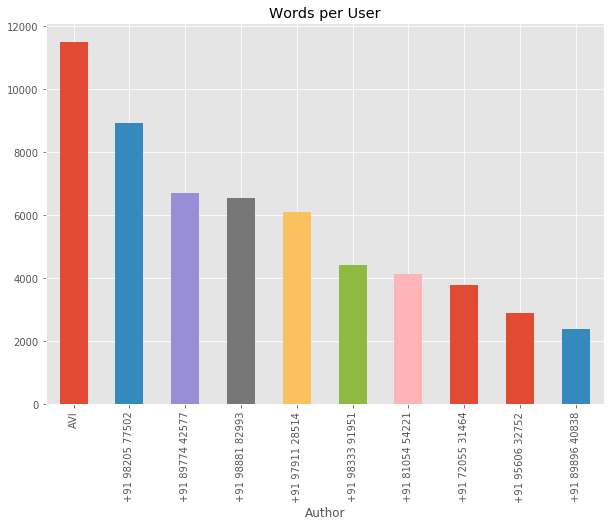

In [52]:
#Distribution of Users with word counts
plt.figure(figsize=(10,7))
word_counts_per_user = df.groupby(['Author'])['Word_Count'].sum().nlargest(10)
word_counts_per_user.plot(kind='bar',title='Words per User')

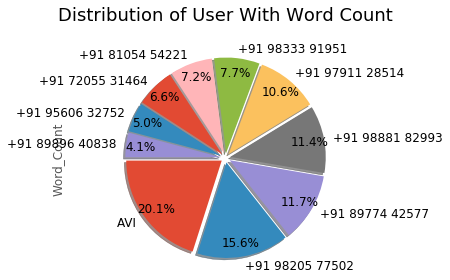

In [57]:
#Distribution per User(Word Counts)
def pie_chart_plot(word_count):
    fig,ax = plt.subplots()
    explodex =[]
    for i in np.arange(len(word_count)):
        explodex.append(0.05)
    ax = word_count.plot(kind='pie',shadow=True, fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85, explode = explodex)
    ax.axis('equal')  
    ax.set_title("Distribution of User With Word Count\n", fontsize=18)
    plt.tight_layout()
    plt.show()
    
pie_chart_plot(word_counts_per_user)

In [58]:
#Emojis Counts
!pip install emoji

  Running setup.py bdist_wheel for emoji: started
  Running setup.py bdist_wheel for emoji: finished with status 'done'
  Stored in directory: C:\Users\AVINASH\AppData\Local\pip\Cache\wheels\2a\a9\0a\4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji


In [59]:
import emoji
def extract_emoji(str1):
    return ''.join(c for c in str1 if c in emoji.UNICODE_EMOJI )

In [62]:
df['EMOJI'] = df['Message'].apply(extract_emoji)
df.head(20)

,Date,Time,AM/PM,Author,Message,Word_Count,Letter_Count,EMOJI
1,11/19/19,4:02,PM,+91 99875 07468,Same here I cud t attend .. office issues,41,9,
2,11/19/19,4:10,PM,+91 81054 54221,"I think there is ""view recordings"" section is ...",117,22,
3,11/19/19,4:11,PM,+91 81054 54221,Only theory... Try to catch next session becau...,72,13,
4,11/19/19,4:12,PM,+91 72055 31464,Sure sure,9,2,
5,11/19/19,4:12,PM,+91 72055 31464,Thanks for the note,19,4,
6,11/19/19,4:12,PM,+91 81054 54221,😊,1,1,😊
7,11/19/19,4:13,PM,+91 98333 91951,Not everyone has access to view recording,41,7,
8,11/19/19,4:14,PM,+91 81054 54221,Ohh okay ... Got it 😊,21,6,😊
9,11/19/19,4:14,PM,+91 93993 84457,I think you can access same day only,36,8,
10,11/19/19,4:15,PM,+91 90321 13803,"Shubham, As per today's class , prudvi said h...",135,24,


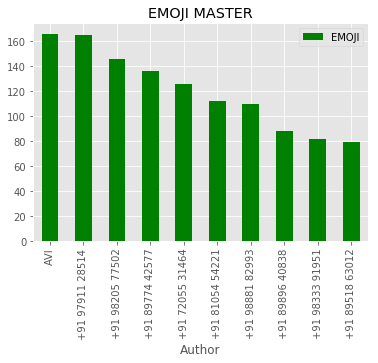

In [83]:
EMOJIS_PER_USER = df.groupby('Author').count()['EMOJI'].reset_index()
EMOJIS_PER_USER.sort_values('EMOJI',ascending=False,inplace=True)
EMOJIS_PER_USER[:10].plot('Author','EMOJI',kind='bar',title='EMOJI MASTER',color='green')

In [84]:
import collections
import emoji
df["Author"].unique()
emoji_ctr = collections.Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in df.iterrows():
        emojis_found = r.findall(row["Message"])
        for emoji_found in emojis_found:
            emoji_ctr[emoji_found] += 1
for item in emoji_ctr.most_common(10):
    print(item[0] + " - " + str(item[1]))

👍 - 77
🏻 - 31
😊 - 23
😂 - 19
😅 - 13
😀 - 11
😁 - 10
😜 - 8
🏼 - 4
🤟 - 4


<Figure size 1440x504 with 0 Axes>

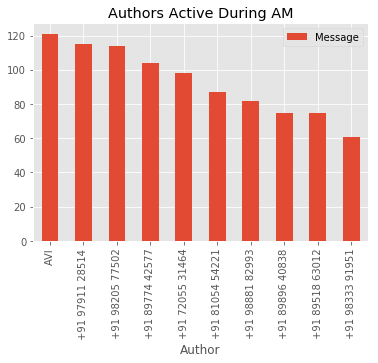

In [155]:
#Users Activity By Time
plt.figure(figsize=(20,7))
active_time = df[['AM/PM','Message','Author']]
active_time = active_time.groupby(['AM/PM','Author']).count().reset_index()
active_time[active_time['AM/PM']=='AM']
active_time.sort_values('Message',ascending=False)[:10].plot(x='Author',kind='bar',title='Authors Active During AM')


<Figure size 720x504 with 0 Axes>

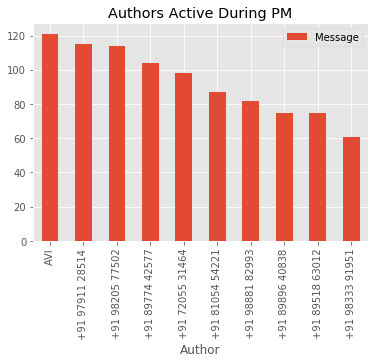

In [154]:
plt.figure(figsize=(10,7))
active_time = df[['AM/PM','Message','Author']]
active_time = active_time.groupby(['AM/PM','Author']).count().reset_index()
active_time[active_time['AM/PM']=='PM']
active_time = active_time.sort_values('Message',ascending=False)[:10]
active_time.plot(x='Author',kind='bar',title="Authors Active During PM")

In [131]:
#DateWise Count of Messages
datewise_message_counts = df.groupby(['Date'],sort=False)['Date'].value_counts().nlargest(10)

Text(0, 0.5, 'No of Messages')

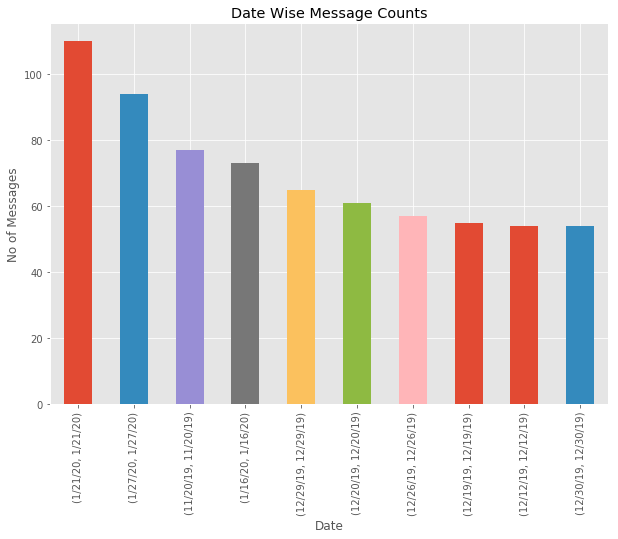

In [132]:
plt.figure(figsize=(10,7))
datewise_message_counts.plot(kind='bar',title='Date Wise Message Counts')
plt.xlabel("Date")
plt.ylabel("No of Messages")

In [153]:
datewise_message_counts = df.groupby(['Date'],sort=False)['Date'].value_counts()
dates = df.groupby('Date',sort=False)['Date'].count()
dates[:10]
type

Date
11/19/19    36
11/20/19    77
11/21/19    36
11/22/19    31
11/23/19    30
11/24/19    22
11/25/19     4
11/26/19    25
11/27/19     1
11/29/19    52
Name: Date, dtype: int64

In [151]:
def plot_linechart(data):
    plt.figure(figsize=(10,7))
    ax= data.plot(kind='line',color='green',fontsize=15)
    ax.set_title('Distribution of Date with No of Messages',fontsize=18)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Messages", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

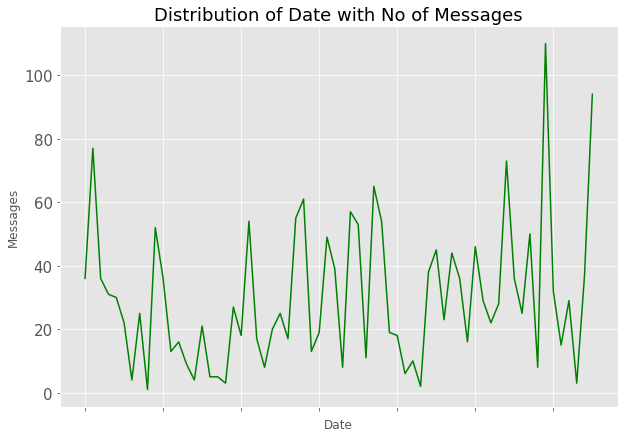

In [152]:
plot_linechart(dates)

In [174]:
df['mention'] = df['Message'].str.findall(r'@([^:\s]+)')

In [175]:
df.head()

,Date,Time,AM/PM,Author,Message,Word_Count,Letter_Count,EMOJI,mention
1,11/19/19,4:02,PM,+91 99875 07468,Same here I cud t attend .. office issues,41,9,,[]
2,11/19/19,4:10,PM,+91 81054 54221,"I think there is ""view recordings"" section is ...",117,22,,[]
3,11/19/19,4:11,PM,+91 81054 54221,Only theory... Try to catch next session becau...,72,13,,[]
4,11/19/19,4:12,PM,+91 72055 31464,Sure sure,9,2,,[]
5,11/19/19,4:12,PM,+91 72055 31464,Thanks for the note,19,4,,[]


In [203]:
# df[len(df['mention'])>0]
index = df.index[df.astype(str)['mention'] == '[]']
index
mentionsdata = df.drop(index)
mentionsdata.shape
# df[['Author','mention']]

(97, 9)

In [177]:
df.dropna(df)

,Date,Time,AM/PM,Author,Message,Word_Count,Letter_Count,EMOJI,mention
1,11/19/19,4:02,PM,+91 99875 07468,Same here I cud t attend .. office issues,41,9,,[]
2,11/19/19,4:10,PM,+91 81054 54221,"I think there is ""view recordings"" section is ...",117,22,,[]
3,11/19/19,4:11,PM,+91 81054 54221,Only theory... Try to catch next session becau...,72,13,,[]
4,11/19/19,4:12,PM,+91 72055 31464,Sure sure,9,2,,[]
5,11/19/19,4:12,PM,+91 72055 31464,Thanks for the note,19,4,,[]
6,11/19/19,4:12,PM,+91 81054 54221,😊,1,1,😊,[]
7,11/19/19,4:13,PM,+91 98333 91951,Not everyone has access to view recording,41,7,,[]
8,11/19/19,4:14,PM,+91 81054 54221,Ohh okay ... Got it 😊,21,6,😊,[]
9,11/19/19,4:14,PM,+91 93993 84457,I think you can access same day only,36,8,,[]
10,11/19/19,4:15,PM,+91 90321 13803,"Shubham, As per today's class , prudvi said h...",135,24,,[]


In [ ]:
df